In [2]:
import IO
import numpy as np
import matplotlib.pyplot as plt
import file_path
%matplotlib inline
DOWN, UP=0,1

2.7.13 |Anaconda custom (64-bit)| (default, Dec 20 2016, 23:09:15) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


#### $J_1$-$J_2$ model on square lattice

In [3]:
def J1J2_HTE(beta, order):
    if order > 8:
        print "Not Implemented!"
        return
    r= 3.0/4.0
    J_1 = 1.0
    J_2 = 0.5
    c_list = [0]*9
    c_list[1] = r/3
    c_list[2] = -4.0/9*r**2*(J_1+J_2)
    c_list[3] = 1.0/27*r**2 *(3*J_1**2*(-1+4.0*r) +32.0*J_1*J_2*r+3*J_2**2*(-1+4.0*r))
    
    c_list[4] = -2.0/405*r**2*(3*J_1**3*(2.0-17.0*r+28*r**2)+10*J_1**2*J_2*r*(-9+34*r)+
                               20*J_1*J_2**2*r*(-3+20*r)+3*J_2**3*(2-17*r+28*r**2))
    
    c_list[5] = 1.0/4860*r**2*(J_1**4*(-45+648*r-1808*r**2+1712*r**3)+120*J_1**3*J_2*r*(5-54*r+80*r**2)+
                               12*J_1**2*J_2**2*r*(69-574*r+1536*r**2)+192*J_1*J_2**3*r*(2-27*r+68*r**2)+
                               J_2**4*(-45+648*r-1808*r**2+1712*r**3))
                              
    c_list[6] = -1.0/127575*r**2*(2*J_1**5*(216-4131*r+18339*r**2-28710*r**3+18100*r**4) + 
                                  21*J_1**4*J_2*r*(-279+4801*r-14048*r**2+12368*r**3) +
                                  14*J_1**3*J_2**2*r*(-477+7158*r-40044*r**2+49864*r**3) +
                                  35*J_1**2*J_2**3*r*(-216+3261*r-13504*r**2+24240*r**3) +
                                  350*J_1*J_2**4*r*(-9+186*r-832*r**2+1168*r**3) +
                                  2*J_2**5*(216-4131*r+18339*r**2-28710*r**3+18100*r**4))
                              
    c_list[7] = 1.0/3061800*r**2*(J_1**6*(-4347+99738*r-623943*r**2+1392666*r**3-1440944*r**4+673152*r**5) +
                                  28*J_1**5*J_2*r*(2133-44406*r+223896*r**2-351328*r**3+209664*r**4) +
                                  42*J_1**4*J_2**2*r*(1620-35649*r+248050*r**2-618992*r**3+485984*r**4) +
                                  28*J_1**3*J_2**3*r*(2061-46134*r+389520*r**2-1234240*r**3+1254912*r**4) +
                                  2*J_1**2*J_2**4*r*(36936-789687*r+4517328*r**2-12128272*r**3+15232512*r**4) +
                                  64*J_1*J_2**5*r*(432-11097*r+75108*r**2-181180*r**3+166680*r**4) +
                                  J_2**6*(-4347+99738*r-623943*r**2+1392666*r**3-1440944*r**4+673152*r**5))
                              
    c_list[8] = -1.0/91854000*r**2*(3*J_1**7*(20520-536112*r+4174761*r**2-12734370*r**3+18166056*r**4-13785984*r**5+5028608*r**6) +
                                    8*J_1**6*J_2*r*(-108459+2561472*r-17865060*r**2+42056212*r**3-43723408*r**4+19466016*r**5) +
                                    8*J_1**5*J_2**2*r*(-120123+3081636*r-26591049*r**2+104756322*r**3-150488432*r**4+82730944*r**5) +
                                    4*J_1**4*J_2**3*r*(-205416+6235740*r-66481989*r**2+275607666*r**3-543091408*r**4+372472256*r**5) +
                                    2*J_1**3*J_2**4*r*(-364932 +10618461*r-111258000*r**2+530418656*r**3-1116577664*r**4+926078848*r**5) +
                                    20*J_1**2*J_2**5*r*(-51678+1313703*r-10031442*r**2+34441608*r**3-66122048*r**4+61121472*r**5) +
                                    80*J_1*J_2**6*r*(-4347+127044*r-1130751*r**2+3894570*r**3-6116240*r**4+4059904*r**5) +
                                    3*J_2**7*(20520-536112*r+4174761*r**2-12734370*r**3+18166056*r**4-13785984*r**5+5028608*r**6))

    return np.sum([3.0*c_list[i]*beta**i for i in range(1, order+1)])

In [4]:
for i in range(0, 9):
    print J1J2_HTE(0.5, i)

0.0
0.375
0.09375
0.24609375
0.181640625
0.204139709473
0.196986579895
0.199317516883
0.19853399474


In [5]:
T_list = np.linspace(0.5, 3.0, 100)
HTE_list = np.zeros((10, len(T_list)))

In [6]:
for t in range(len(T_list)):
    for i in range(8):
        order = i + 1
        HTE_list[i,t] = J1J2_HTE(1.0/T_list[t], order)

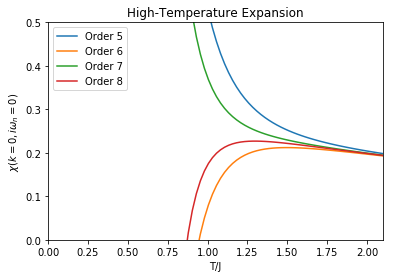

In [7]:
plt.figure()
for i in range(4, 8):
    plt.plot(T_list, HTE_list[i], label="Order "+str(i+1))
#y=[0.0937,]*MaxTauBin
#plt.plot(TGrid, y, 'k--', label="Unbiased MC")
plt.ylim([0.0, 0.5])
plt.xlim([0.0, 2.1])
plt.xlabel("T/J")
plt.ylabel(r"$\chi(k=0, i\omega_n=0)$")
plt.legend()
plt.title("High-Temperature Expansion")

plt.savefig("J1J2_High-Temperature.pdf")
plt.show()

In [8]:
def read_data(filename):
    data = IO.LoadBigDict(filename)
    if 'GammaG' in data:
        rGammaG = np.array(data["GammaG"]["SmoothT"])
    elif 'GGGammaG' in data:
        rGammaG = np.array(data["GGGammaG"]["SmoothT"])    
    Chi = np.array(data["Chi"]["SmoothT"])[0,0,0,0,:,:]
    BKChi = None
    if "BKChi" in data:
        BKChi = np.array(data["BKChi"]["SmoothT"])[0,0,0,0,:,:]
    return (rGammaG, Chi, BKChi)

In [9]:
def get_static_uniform_chi(data, beta):
    avg=beta*np.average(np.sum(data.real,axis=0))
    return avg

In [10]:
def get_energy(data, beta):
    return data[1, 0].real*2

In [11]:
def get_error(data, order):
    error = 0.0
    if order > 1:
        unif = np.sum(data.real, axis=0)
        error = np.max(unif) - np.min(unif)
    return error + 0.0002

In [12]:
def get_chi00(data):
    return data[0, 0].real

In [13]:
def get_chi0(data):
    return data[0, :].real

In [14]:
rGammaG = {}
Chi = {}
BKChi = {}
DiagMC_J1J2 = {}
CDMC_J1J2 = {}
HTE_J1J2 = {}

In [15]:
beta = 1.0
n_order = 5

In [16]:
for i in range(1, n_order+1):
    print file_path.path("J1J2", beta, i)
    rGammaG[(beta, i)], Chi[(beta, i)], BKChi[(beta, i)] = read_data(file_path.path("J1J2", beta, i))

/mnt/data/GammaBK_J1J2/Beta1.0/Beta1.0_Order1/Weight
/mnt/data/GammaBK_J1J2/Beta1.0/Beta1.0_Order2/Weight
/mnt/data/GammaBK_J1J2/Beta1.0/Beta1.0_Order3/Weight
/mnt/data/GammaBK_J1J2/Beta1.0/Beta1.0_Order4/Weight
/mnt/data/GammaBK_J1J2/Beta1.0/Beta1.0_Order5/Weight


In [17]:
Chi00_DMC = {}
Chi00_DMC[beta] = np.zeros((n_order, 3))
Chi00_DMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    Chi00_DMC[beta][i-1,1] = get_chi00(Chi[(beta, i)])
    Chi00_DMC[beta][i-1,2] = 3.0*get_error(BKChi[(beta, i)], i) 
    
Chi00_CDMC = {}
Chi00_CDMC[beta] = np.zeros((n_order, 3))
Chi00_CDMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    Chi00_CDMC[beta][i-1,1] = 3.0*get_chi00(BKChi[(beta, i)])
    Chi00_CDMC[beta][i-1,2] = 3.0*get_error(BKChi[(beta, i)], i)

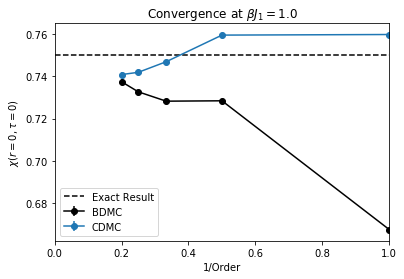

In [18]:
plt.figure()
plt.errorbar(1.0/Chi00_DMC[beta][:,0], Chi00_DMC[beta][:, 1], yerr=Chi00_DMC[beta][:,2], c="k", label="BDMC",fmt='o-')
plt.errorbar(1.0/Chi00_CDMC[beta][:,0], Chi00_CDMC[beta][:, 1], yerr=Chi00_CDMC[beta][:,2], label="CDMC",fmt='o-')
y=[0.75]*2
plt.plot([0.0, 1.0], y, 'k--', label="Exact Result")
#plt.ylim([0.25, 0.3])
plt.xlim([0,1])
plt.xlabel("1/Order")
plt.ylabel(r"$\chi(r=0, \tau=0)$")
plt.title(r"Convergence at $\beta J_1 = 1.0$")
plt.legend()

plt.savefig("J1J2_Sum_Rule_Beta1.pdf")
plt.show()

In [19]:
Chi0_DMC = {}
Chi0_DMC[beta] = []
for i in range(1, n_order+1):
    Chi0_DMC[beta].append(get_chi0(Chi[(beta, i)]))
    
Chi0_CDMC = {}
Chi0_CDMC[beta] = []
for i in range(1, n_order+1):
    Chi0_CDMC[beta].append(3.0*get_chi0(BKChi[(beta, i)]))

Tau = {}
Tau[beta] = (np.array(range(len(Chi0_DMC[beta][0])))+0.5)*beta/len(Chi0_DMC[beta][0])

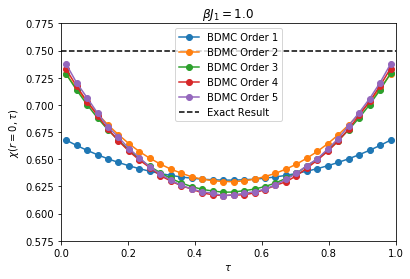

In [20]:
plt.figure()
for i in range(0, 5):
    plt.plot(Tau[beta], Chi0_DMC[beta][i], 'o-', label="BDMC Order {}".format(i+1))
y=[0.75]*2
plt.plot([0.0, 1.0], y, 'k--', label="Exact Result")
plt.ylim([0.575, 0.775])
plt.xlim([0,1])
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\chi(r=0, \tau)$")
plt.title(r"$\beta J_1 = 1.0$")
plt.legend()
plt.savefig("J1J2_chi0_Beta1.pdf")
plt.show()

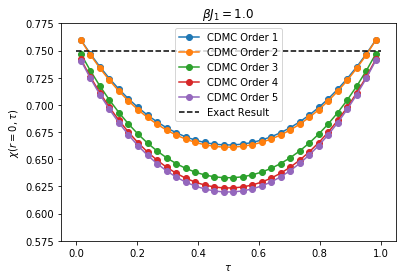

In [21]:
plt.figure()
for i in range(0, 5):
    plt.plot(Tau[beta], Chi0_CDMC[beta][i], 'o-', label="CDMC Order {}".format(i+1))
y=[0.75]*2
plt.plot([0.0, 1.0], y, 'k--', label="Exact Result")
plt.ylim([0.575, 0.775])
#plt.xlim([0.4,0.6])
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\chi(r=0, \tau)$")
plt.title(r"$\beta J_1 = 1.0$")
plt.legend()
plt.savefig("J1J2_chi0_Beta1_CDMC.pdf")
plt.show()

In [22]:
DiagMC_J1J2[beta] = np.zeros((n_order, 3))
DiagMC_J1J2[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    DiagMC_J1J2[beta][i-1,1] = get_static_uniform_chi(Chi[(beta, i)], beta)
    DiagMC_J1J2[beta][i-1,2] = 3.0*get_error(BKChi[(beta, i)], i)  

In [23]:
HTE_Order = np.array(range(1, 9))
HTE_J1J2[beta] = np.array([J1J2_HTE(beta, order) for order in HTE_Order])

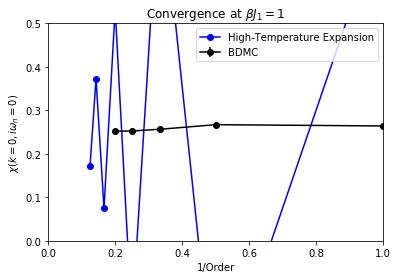

In [24]:
plt.figure()
plt.errorbar(1.0/DiagMC_J1J2[beta][:,0], DiagMC_J1J2[beta][:, 1], yerr=DiagMC_J1J2[beta][:,2], 
             c="k", label="BDMC",fmt='o-')
plt.plot(1.0/HTE_Order, HTE_J1J2[beta],'o-', c='b', label="High-Temperature Expansion")
plt.ylim([0.0, 0.5])
plt.xlim([0,1])
plt.xlabel("1/Order")
plt.ylabel(r"$\chi(k=0, i\omega_n=0)$")
plt.title(r"Convergence at $\beta J_1 = 1$")
plt.legend()
plt.savefig("J1J2_Convergence_Beta1.pdf")
plt.show()

In [25]:
CDMC_J1J2[beta] = np.zeros((n_order, 3))
CDMC_J1J2[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    CDMC_J1J2[beta][i-1,1] = 3.0*get_static_uniform_chi(BKChi[(beta, i)], beta)
    CDMC_J1J2[beta][i-1,2] = 3.0*get_error(BKChi[(beta, i)], i)  

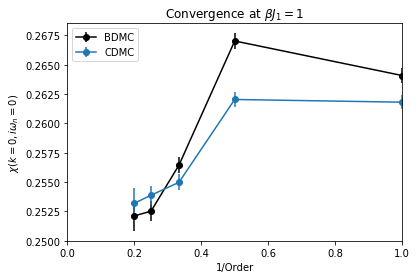

In [26]:
plt.figure()
plt.errorbar(1.0/DiagMC_J1J2[beta][:,0], DiagMC_J1J2[beta][:, 1], yerr=DiagMC_J1J2[beta][:,2], c="k", label="BDMC",fmt='o-')
plt.errorbar(1.0/CDMC_J1J2[beta][:,0], CDMC_J1J2[beta][:, 1], yerr=CDMC_J1J2[beta][:,2], label="CDMC",fmt='o-')
#plt.plot(1.0/HTE_Order, HTE_triangular,'o-', c='b', label="High-Temperature Expansion")
#y=[0.0814*3]*2

#plt.plot([0.0, 1.0], y, 'k--', label="Unbiased MC")
#plt.ylim([0.235, 0.27])
plt.xlim([0,1])
plt.xlabel("1/Order")
plt.ylabel(r"$\chi(k=0, i\omega_n=0)$")
plt.title(r"Convergence at $\beta J_1 = 1$")
plt.legend()

plt.savefig("J1J2_Convergence_Beta1_with_CDMC.pdf")
plt.show()

In [27]:
Energy_DMC = {}
Energy_DMC[beta] = np.zeros((n_order, 3))
Energy_DMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    Energy_DMC[beta][i-1,1] = get_energy(Chi[(beta, i)], beta)
    Energy_DMC[beta][i-1,2] = 3.0*2.0*get_error(BKChi[(beta, i)], i) 

Energy_CDMC = {}
Energy_CDMC[beta] = np.zeros((n_order, 3))
Energy_CDMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    Energy_CDMC[beta][i-1,1] = 3.0*get_energy(BKChi[(beta, i)], beta)
    Energy_CDMC[beta][i-1,2] = 3.0*2.0*get_error(BKChi[(beta, i)], i)

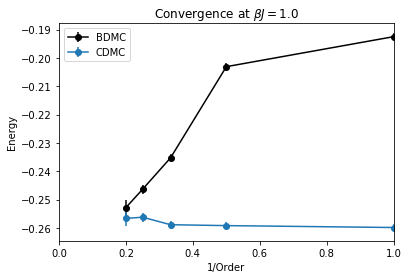

In [28]:
plt.figure()
plt.errorbar(1.0/Energy_DMC[beta][:,0], Energy_DMC[beta][:, 1], yerr=Energy_DMC[beta][:,2], c="k", label="BDMC",fmt='o-')
plt.errorbar(1.0/Energy_CDMC[beta][:,0], Energy_CDMC[beta][:, 1], yerr=Energy_CDMC[beta][:,2], label="CDMC",fmt='o-')
#y=[-0.3880]*2
#plt.plot([0.0, 1.0], y, 'k--', label="Unbiased MC")
#plt.ylim([0.25, 0.3])
plt.xlim([0,1])
plt.xlabel("1/Order")
plt.ylabel("Energy")
plt.title(r"Convergence at $\beta J = 1.0$")
plt.legend()

plt.savefig("J1J2_Energy_Beta1_with_CDMC.pdf")
plt.show()

In [29]:
beta = 1.5
n_order = 5

In [30]:
for i in range(1, n_order+1):
    print file_path.path("J1J2", beta, i)
    rGammaG[(beta, i)], Chi[(beta, i)], BKChi[(beta, i)] = read_data(file_path.path("J1J2", beta, i))

/mnt/data/GammaBK_J1J2/Beta1.5/Beta1.5_Order1/Weight
/mnt/data/GammaBK_J1J2/Beta1.5/Beta1.5_Order2/Weight
/mnt/data/GammaBK_J1J2/Beta1.5/Beta1.5_Order3/Weight
/mnt/data/GammaBK_J1J2/Beta1.5/Beta1.5_Order4/Weight
/mnt/data/GammaBK_J1J2/Beta1.5/Beta1.5_Order5/Weight


In [31]:
DiagMC_J1J2[beta] = np.zeros((n_order, 3))
DiagMC_J1J2[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    DiagMC_J1J2[beta][i-1,1] = get_static_uniform_chi(Chi[(beta, i)], beta)
    DiagMC_J1J2[beta][i-1,2] = 3.0*get_error(BKChi[(beta, i)], i)

In [32]:
HTE_Order = np.array(range(1, 9))
HTE_J1J2[beta] = np.array([J1J2_HTE(beta, order) for order in HTE_Order])

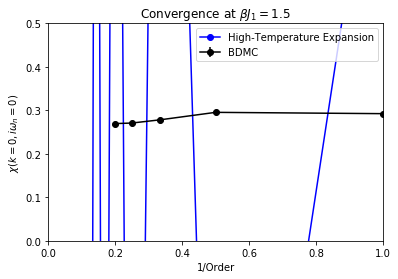

In [33]:
plt.figure()
plt.errorbar(1.0/DiagMC_J1J2[beta][:,0], DiagMC_J1J2[beta][:, 1], yerr=DiagMC_J1J2[beta][:,2], 
             c="k", label="BDMC",fmt='o-')
plt.plot(1.0/HTE_Order, HTE_J1J2[beta],'o-', c='b', label="High-Temperature Expansion")
plt.ylim([0.0, 0.5])
plt.xlim([0,1])
plt.xlabel("1/Order")
plt.ylabel(r"$\chi(k=0, i\omega_n=0)$")
plt.title(r"Convergence at $\beta J_1 = 1.5$")
plt.legend()
plt.savefig("J1J2_Convergence_Beta15.pdf")
plt.show()

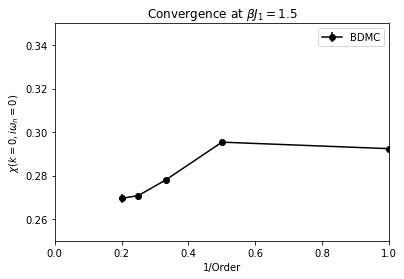

In [49]:
plt.figure()
plt.errorbar(1.0/DiagMC_J1J2[beta][:,0], DiagMC_J1J2[beta][:, 1], yerr=DiagMC_J1J2[beta][:,2], 
             c="k", label="BDMC",fmt='o-')
#plt.plot(1.0/HTE_Order, HTE_J1J2[beta],'o-', c='b', label="High-Temperature Expansion")
plt.ylim([0.25, 0.35])
plt.xlim([0,1])
plt.xlabel("1/Order")
plt.ylabel(r"$\chi(k=0, i\omega_n=0)$")
plt.title(r"Convergence at $\beta J_1 = 1.5$")
plt.legend()
plt.savefig("J1J2_Convergence_Beta15_withoutHTE.pdf")
plt.show()

In [34]:
CDMC_J1J2[beta] = np.zeros((n_order, 3))
CDMC_J1J2[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    CDMC_J1J2[beta][i-1,1] = 3.0*get_static_uniform_chi(BKChi[(beta, i)], beta)
    CDMC_J1J2[beta][i-1,2] = 3.0*get_error(BKChi[(beta, i)], i)  

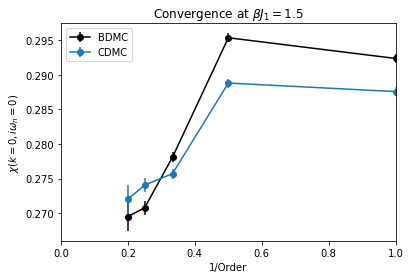

In [36]:
plt.figure()
plt.errorbar(1.0/DiagMC_J1J2[beta][:,0], DiagMC_J1J2[beta][:, 1], yerr=DiagMC_J1J2[beta][:,2], c="k", label="BDMC",fmt='o-')
plt.errorbar(1.0/CDMC_J1J2[beta][:,0], CDMC_J1J2[beta][:, 1], yerr=CDMC_J1J2[beta][:,2], label="CDMC",fmt='o-')
#plt.plot(1.0/HTE_Order, HTE_triangular,'o-', c='b', label="High-Temperature Expansion")
#y=[0.0814*3]*2

#plt.plot([0.0, 1.0], y, 'k--', label="Unbiased MC")
#plt.ylim([0.235, 0.27])
plt.xlim([0,1])
plt.xlabel("1/Order")
plt.ylabel(r"$\chi(k=0, i\omega_n=0)$")
plt.title(r"Convergence at $\beta J_1 = 1.5$")
plt.legend()

plt.savefig("J1J2_Convergence_Beta15_with_CDMC.pdf")
plt.show()

In [37]:
Energy_DMC = {}
Energy_DMC[beta] = np.zeros((n_order, 3))
Energy_DMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    Energy_DMC[beta][i-1,1] = get_energy(Chi[(beta, i)], beta)
    Energy_DMC[beta][i-1,2] = 3.0*2.0*get_error(BKChi[(beta, i)], i) 

Energy_CDMC = {}
Energy_CDMC[beta] = np.zeros((n_order, 3))
Energy_CDMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    Energy_CDMC[beta][i-1,1] = 3.0*get_energy(BKChi[(beta, i)], beta)
    Energy_CDMC[beta][i-1,2] = 3.0*2.0*get_error(BKChi[(beta, i)], i)

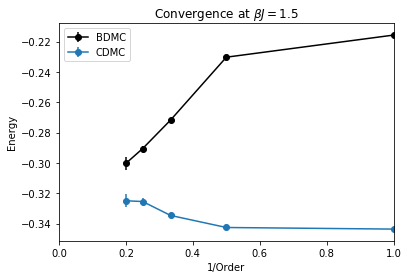

In [38]:
plt.figure()
plt.errorbar(1.0/Energy_DMC[beta][:,0], Energy_DMC[beta][:, 1], yerr=Energy_DMC[beta][:,2], c="k", label="BDMC",fmt='o-')
plt.errorbar(1.0/Energy_CDMC[beta][:,0], Energy_CDMC[beta][:, 1], yerr=Energy_CDMC[beta][:,2], label="CDMC",fmt='o-')
#y=[-0.3880]*2
#plt.plot([0.0, 1.0], y, 'k--', label="Unbiased MC")
#plt.ylim([0.25, 0.3])
plt.xlim([0,1])
plt.xlabel("1/Order")
plt.ylabel("Energy")
plt.title(r"Convergence at $\beta J = 1.5$")
plt.legend()

plt.savefig("J1J2_Energy_Beta15_with_CDMC.pdf")
plt.show()

In [39]:
Chi00_DMC = {}
Chi00_DMC[beta] = np.zeros((n_order, 3))
Chi00_DMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    Chi00_DMC[beta][i-1,1] = get_chi00(Chi[(beta, i)])
    Chi00_DMC[beta][i-1,2] = 3.0*get_error(BKChi[(beta, i)], i) 
    
Chi00_CDMC = {}
Chi00_CDMC[beta] = np.zeros((n_order, 3))
Chi00_CDMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    Chi00_CDMC[beta][i-1,1] = 3.0*get_chi00(BKChi[(beta, i)])
    Chi00_CDMC[beta][i-1,2] = 3.0*get_error(BKChi[(beta, i)], i)

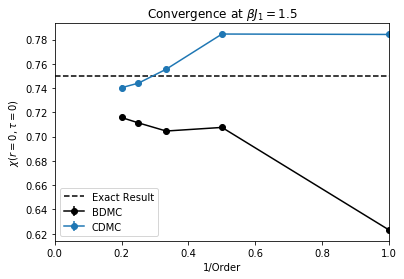

In [40]:
plt.figure()
plt.errorbar(1.0/Chi00_DMC[beta][:,0], Chi00_DMC[beta][:, 1], yerr=Chi00_DMC[beta][:,2], c="k", label="BDMC",fmt='o-')
plt.errorbar(1.0/Chi00_CDMC[beta][:,0], Chi00_CDMC[beta][:, 1], yerr=Chi00_CDMC[beta][:,2], label="CDMC",fmt='o-')
y=[0.75]*2
plt.plot([0.0, 1.0], y, 'k--', label="Exact Result")
#plt.ylim([0.25, 0.3])
plt.xlim([0,1])
plt.xlabel("1/Order")
plt.ylabel(r"$\chi(r=0, \tau=0)$")
plt.title(r"Convergence at $\beta J_1 = 1.5$")
plt.legend()

plt.savefig("J1J2_Sum_Rule_Beta15.pdf")
plt.show()

In [41]:
Chi0_DMC = {}
Chi0_DMC[beta] = []
for i in range(1, n_order+1):
    Chi0_DMC[beta].append(get_chi0(Chi[(beta, i)]))
    
Chi0_CDMC = {}
Chi0_CDMC[beta] = []
for i in range(1, n_order+1):
    Chi0_CDMC[beta].append(3.0*get_chi0(BKChi[(beta, i)]))

Tau = {}
Tau[beta] = (np.array(range(len(Chi0_DMC[beta][0])))+0.5)*beta/len(Chi0_DMC[beta][0])

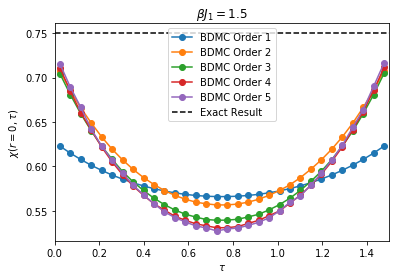

In [45]:
plt.figure()
for i in range(0, 5):
    plt.plot(Tau[beta], Chi0_DMC[beta][i], 'o-', label="BDMC Order {}".format(i+1))
y=[0.75]*2
plt.plot([0.0, beta], y, 'k--', label="Exact Result")
#plt.ylim([0.575, 0.775])
plt.xlim([0,beta])
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\chi(r=0, \tau)$")
plt.title(r"$\beta J_1 = 1.5$")
plt.legend()
plt.savefig("J1J2_chi0_Beta15.pdf")
plt.show()

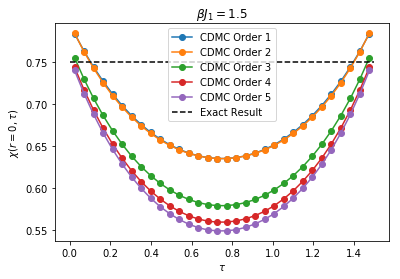

In [47]:
plt.figure()
for i in range(0, 5):
    plt.plot(Tau[beta], Chi0_CDMC[beta][i], 'o-', label="CDMC Order {}".format(i+1))
y=[0.75]*2
plt.plot([0.0, beta], y, 'k--', label="Exact Result")
#plt.ylim([0.575, 0.775])
#plt.xlim([0.4,0.6])
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\chi(r=0, \tau)$")
plt.title(r"$\beta J_1 = 1.5$")
plt.legend()
plt.savefig("J1J2_chi0_Beta15_CDMC.pdf")
plt.show()